### Process Data

### combining files

In [11]:
# import numpy as np
import pandas as pd
import glob
import os

path = r'fwddailynexusprarequestforlibraryflooroccupancydat' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f,header=5) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
# doesn't create a list, nor does it append to one
concatenated_df.to_csv("Lib_hours.zip",compression="gzip")

In [6]:
df["Average Occupancy"].max()

2815

### Adding new data

In [39]:
# converting new spreadsheets to 
import pandas as pd 
import openpyxl 

pd.read_excel('fwddailynexusprarequestforlibraryflooroccupancydat/OccupancyData--9Dec22-9Jan23.xlsx').to_csv('fwddailynexusprarequestforlibraryflooroccupancydat/OccupancyData--9Dec22-9Jan23', index=False)
pd.read_excel('fwddailynexusprarequestforlibraryflooroccupancydat/OccupancyData--9Jan23-17Jun23 (1).xlsx').to_csv('fwddailynexusprarequestforlibraryflooroccupancydat/OccupancyData--9Jan23-17Jun23.csv', index=False)

In [42]:
# rerunning to add new data 
import glob
import os

path = r'fwddailynexusprarequestforlibraryflooroccupancydat' # use your path
all_files = glob.glob(os.path.join(path, "*.csv")) 

df_from_each_file = (pd.read_csv(f,header=5) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
# doesn't create a list, nor does it append to one
concatenated_df.to_csv("Lib_hours.zip",compression="gzip")

In [43]:
concatenated_df["Timestamp"].tail()

242368    01/31/2022 19:00
242369    01/31/2022 20:00
242370    01/31/2022 21:00
242371    01/31/2022 22:00
242372    01/31/2022 23:00
Name: Timestamp, dtype: object

In [44]:
concatenated_df["Average Occupancy"].max()

3622

In [45]:
import pandas as pd 
selected_vars = ['Location','Timestamp','Average Occupancy','Peak Occupancy','Time Interval','Location Path']
floor = pd.read_csv("Lib_hours.zip", compression = 'gzip', usecols = selected_vars)
# floor.drop(columns='Unamed: 0')
floor['Timestamp'].tail()

242368    01/31/2022 19:00
242369    01/31/2022 20:00
242370    01/31/2022 21:00
242371    01/31/2022 22:00
242372    01/31/2022 23:00
Name: Timestamp, dtype: object

adding quarter value to data frame

In [57]:
import numpy as np 
import pandas as pd 
quarters = pd.DataFrame(np.matrix(
    [['Fall 2021', '9/19/2021', '12/10/2021'],
    ['Winter 2022', '1/3/2022', '3/18/2022'],
    ['Spring 2022', '3/28/2022', '6/3/2022'],
    ['Summer 2022', '6/20/2022', '9/11/2022'],
    ['Fall 2022', '9/18/2022', '12/9/2022'],
    ['Winter 2023', '1/9/2023', '3/24/2023'],
    ['Spring 2023', '4/3/2023', '6/17/2023']]
    ), 
columns=['Quarter','Start','Stop'])
# creating id column, 
# quarters['ID'] = [1,2,3,4,5,6,7]
quarters

,Quarter,Start,Stop
0,Fall 2021,9/19/2021,12/10/2021
1,Winter 2022,1/3/2022,3/18/2022
2,Spring 2022,3/28/2022,6/3/2022
3,Summer 2022,6/20/2022,9/11/2022
4,Fall 2022,9/18/2022,12/9/2022
5,Winter 2023,1/9/2023,3/24/2023
6,Spring 2023,4/3/2023,6/17/2023


In [58]:
# if timestamp in between start and stop, add Quarter label to column, Undefined otherwise 
floor['Datetime'] =  pd.to_datetime(floor['Timestamp']) #, format='%m/%d/%Y %H:%M') 
quarters['Start'] = pd.to_datetime(quarters['Start'], format='%m/%d/%Y') 
quarters['Stop'] = pd.to_datetime(quarters['Stop'], format='%m/%d/%Y') 
quarters
# floor.head()

,Quarter,Start,Stop
0,Fall 2021,2021-09-19,2021-12-10
1,Winter 2022,2022-01-03,2022-03-18
2,Spring 2022,2022-03-28,2022-06-03
3,Summer 2022,2022-06-20,2022-09-11
4,Fall 2022,2022-09-18,2022-12-09
5,Winter 2023,2023-01-09,2023-03-24
6,Spring 2023,2023-04-03,2023-06-17


In [59]:
floor = floor.sort_values('Timestamp', ascending=True)
# create a new column of interval index based on the date range in quarters
intervals = pd.IntervalIndex.from_arrays(quarters['Start'], quarters['Stop'], closed='both')
# get the index of the interval for each row in floor
indexer = intervals.get_indexer(floor['Datetime'])
# use the category column of quarters to assign the corresponding label to each row in floor
floor['Quarter'] = quarters['Quarter'].iloc[indexer].values
# floor
floor.to_csv("libFloor.csv", index=False)

In [60]:
floor_f22 = floor[floor['Quarter'] == 'Fall 2022']
floor_f22.head()

,Location,Timestamp,Average Occupancy,Peak Occupancy,Time Interval,Location Path,Datetime,Quarter
66236,1st Floor,09/18/2022 00:00,1,1,1hour,UCSB > UCSB Library > 1st Floor,2022-09-18,Fall 2022
69115,2nd Floor,09/18/2022 00:00,0,1,1hour,UCSB > UCSB Library > 2nd Floor,2022-09-18,Fall 2022
77029,8th Floor GRS,09/18/2022 00:00,0,0,1hour,UCSB > UCSB Library > Graduate Studies > 8th F...,2022-09-18,Fall 2022
74155,8th Floor,09/18/2022 00:00,15,17,1hour,UCSB > UCSB Library > 8th Floor,2022-09-18,Fall 2022
71275,4th Floor,09/18/2022 00:00,0,1,1hour,UCSB > UCSB Library > 4th Floor,2022-09-18,Fall 2022


In [61]:
floor_w22 = floor[floor['Quarter'] == 'Winter 2022']
floor_w22

,Location,Timestamp,Average Occupancy,Peak Occupancy,Time Interval,Location Path,Datetime,Quarter
233506,2nd Floor,01/03/2022 00:00,1,1,1hour,UCSB > UCSB Library > 2nd Floor,2022-01-03,Winter 2022
234994,2nd Floor Ocean,01/03/2022 00:00,1,1,1hour,UCSB > UCSB Library > 2nd Floor > 2nd Floor Ocean,2022-01-03,Winter 2022
235738,4th Floor,01/03/2022 00:00,0,3,1hour,UCSB > UCSB Library > 4th Floor,2022-01-03,Winter 2022
237970,7th Floor,01/03/2022 00:00,4,5,1hour,UCSB > UCSB Library > 7th Floor,2022-01-03,Winter 2022
241680,8th Floor GRS,01/03/2022 00:00,0,0,1hour,UCSB > UCSB Library > Graduate Studies > 8th F...,2022-01-03,Winter 2022
...,...,...,...,...,...,...,...,...
87406,Graduate Studies,03/18/2022 00:00,6,7,1hour,UCSB > UCSB Library > Graduate Studies,2022-03-18,Winter 2022
85920,7th Floor,03/18/2022 00:00,4,6,1hour,UCSB > UCSB Library > 7th Floor,2022-03-18,Winter 2022
77747,UCSB Library,03/18/2022 00:00,204,270,1hour,UCSB > UCSB Library,2022-03-18,Winter 2022
82948,2nd Floor Ocean,03/18/2022 00:00,2,9,1hour,UCSB > UCSB Library > 2nd Floor > 2nd Floor Ocean,2022-03-18,Winter 2022


In [62]:
floor_w23 = floor[floor['Quarter'] == 'Winter 2023']
floor_w23

,Location,Timestamp,Average Occupancy,Peak Occupancy,Time Interval,Location Path,Datetime,Quarter
120542,4th Floor,2023-01-09 00:00:00,1,1,1hour,UCSB > UCSB Library > 4th Floor,2023-01-09,Winter 2023
105218,Art & Architecture,2023-01-09 00:00:00,0,1,1hour,UCSB > UCSB Library > 1st Floor > Art & Archit...,2023-01-09,Winter 2023
135866,8th - Quiet Floor,2023-01-09 00:00:00,0,0,1hour,UCSB > UCSB Library > 8th - Quiet Floor,2023-01-09,Winter 2023
93734,1st Floor,2023-01-09 00:00:00,1,1,1hour,UCSB > UCSB Library > 1st Floor,2023-01-09,Winter 2023
97565,1st Floor Mountain,2023-01-09 00:00:00,0,0,1hour,UCSB > UCSB Library > 1st Floor > 1st Floor Mo...,2023-01-09,Winter 2023
...,...,...,...,...,...,...,...,...
129979,6th - Quiet Floor,2023-03-24 00:00:00,0,1,1hour,UCSB > UCSB Library > 6th - Quiet Floor,2023-03-24,Winter 2023
133810,7th - Quiet Floor,2023-03-24 00:00:00,0,0,1hour,UCSB > UCSB Library > 7th - Quiet Floor,2023-03-24,Winter 2023
103171,1st Floor Ocean,2023-03-24 00:00:00,1,3,1hour,UCSB > UCSB Library > 1st Floor > 1st Floor Ocean,2023-03-24,Winter 2023
95509,1st Floor,2023-03-24 00:00:00,81,105,1hour,UCSB > UCSB Library > 1st Floor,2023-03-24,Winter 2023


In [63]:
# issues with spring 
floor_s23 = floor[floor['Quarter'] == 'Spring 2023']
floor_s23

,Location,Timestamp,Average Occupancy,Peak Occupancy,Time Interval,Location Path,Datetime,Quarter
233458,2nd Floor,01/01/2022 00:00,1,1,1hour,UCSB > UCSB Library > 2nd Floor,2022-01-01 00:00:00,Spring 2023
236434,5th Floor,01/01/2022 00:00,0,0,1hour,UCSB > UCSB Library > 5th Floor,2022-01-01 00:00:00,Spring 2023
241632,8th Floor GRS,01/01/2022 00:00,0,0,1hour,UCSB > UCSB Library > Graduate Studies > 8th F...,2022-01-01 00:00:00,Spring 2023
238666,8th Floor,01/01/2022 00:00,1,2,1hour,UCSB > UCSB Library > 8th Floor,2022-01-01 00:00:00,Spring 2023
237178,6th Floor,01/01/2022 00:00,0,2,1hour,UCSB > UCSB Library > 6th Floor,2022-01-01 00:00:00,Spring 2023
...,...,...,...,...,...,...,...,...
135865,7th - Quiet Floor,2023-06-17 23:00:00,1,1,1hour,UCSB > UCSB Library > 7th - Quiet Floor,2023-06-17 23:00:00,Spring 2023
124372,4th Floor,2023-06-17 23:00:00,0,1,1hour,UCSB > UCSB Library > 4th Floor,2023-06-17 23:00:00,Spring 2023
93733,UCSB Library,2023-06-17 23:00:00,6,7,1hour,UCSB > UCSB Library,2023-06-17 23:00:00,Spring 2023
120541,2nd Floor Ocean,2023-06-17 23:00:00,2,2,1hour,UCSB > UCSB Library > 2nd Floor > 2nd Floor Ocean,2023-06-17 23:00:00,Spring 2023


In [19]:
floor.head()

,Location,Timestamp,Average Occupancy,Peak Occupancy,Time Interval,Location Path,Datetime,Quarter
167043,1st Floor Ocean,01/01/2022 00:00,0,0,1hour,UCSB > UCSB Library > 1st Floor > 1st Floor Ocean,2022-01-01,Spring 2023
164811,UCSB Library,01/01/2022 00:00,7,15,1hour,UCSB > UCSB Library,2022-01-01,Spring 2023
168531,2nd Floor,01/01/2022 00:00,1,1,1hour,UCSB > UCSB Library > 2nd Floor,2022-01-01,Spring 2023
165555,1st Floor,01/01/2022 00:00,0,0,1hour,UCSB > UCSB Library > 1st Floor,2022-01-01,Spring 2023
172251,6th Floor,01/01/2022 00:00,0,2,1hour,UCSB > UCSB Library > 6th Floor,2022-01-01,Spring 2023


add quarter and geometry columns
talk to bops/library staff 
pra request update? 

### Time Series Analysis 
* https://machinelearningmastery.com/time-series-data-visualization-with-python/ 
* https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0
* https://towardsdatascience.com/introduction-to-interactive-time-series-visualizations-with-plotly-in-python-d3219eb7a7af 
* sliders: https://plotly.com/python/sliders/ 

In [1]:
# https://machinelearningmastery.com/time-series-data-visualization-with-python/ 
# https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0

/var/folders/5_/dpt6cl3j4fs4w5184wqyd8_r0000gn/T/ipykernel_32980/479117725.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


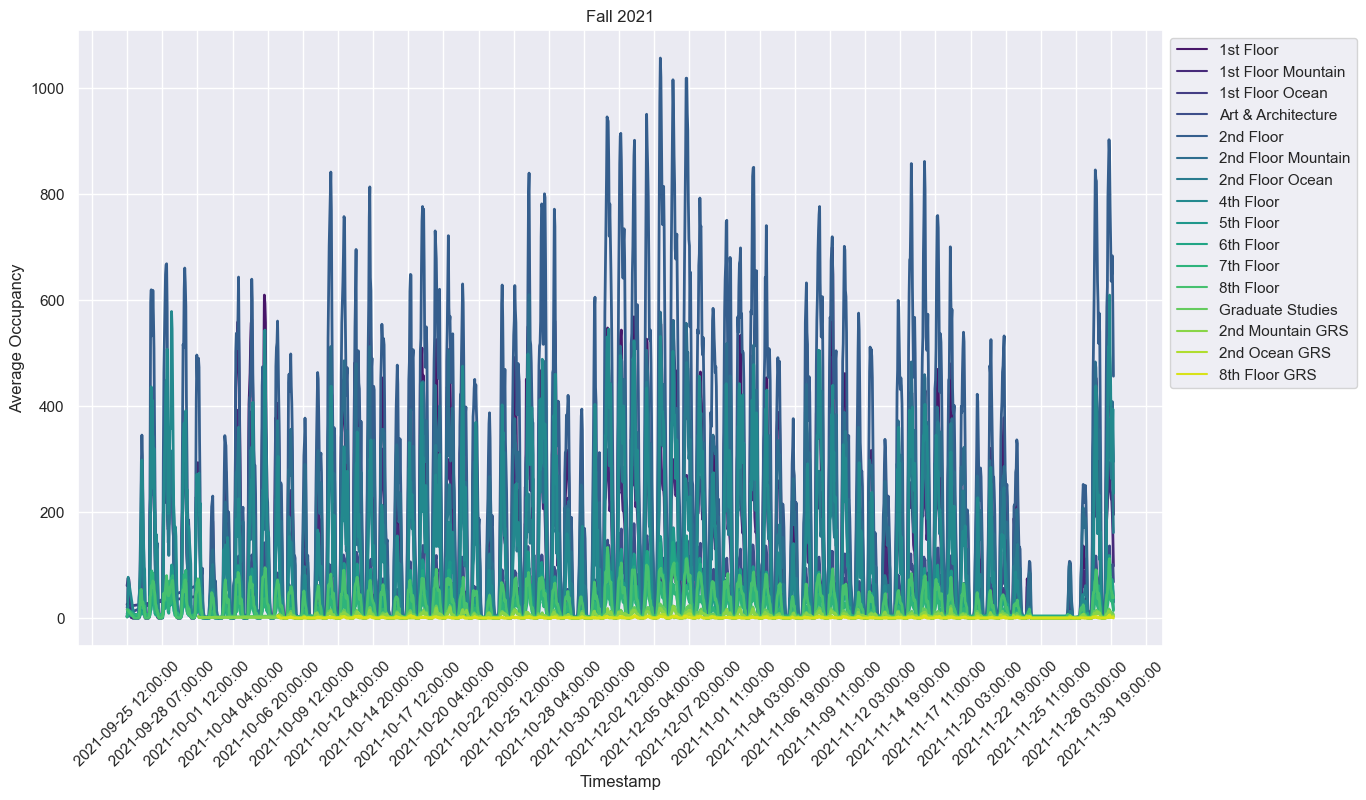

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


# testing this out, will find a way to "optimize" later 
new_floor = floor[~(floor['Location'] == 'UCSB Library')]
new_floor_f21 = new_floor[new_floor['Quarter'] == 'Fall 2021']

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=new_floor_f21, x ='Datetime', y = 'Average Occupancy',
                    hue='Location', palette='viridis',
                    legend='full', lw=2)

# reassign/group tick labels 
# stagger or spread out date time ticks 
ax.xaxis.set_major_locator(ticker.MultipleLocator(64))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Average Occupancy')
plt.xlabel('Timestamp')
plt.title('Fall 2021')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


requirements.txt for environment replication
* run ! pip install requirements.txt

In [ ]:
floor = pd.read_csv("libFloor.csv")
quarters = floor['Quarter'].unique()
print(quarters)